In [4]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
from scipy import signal
from MRPy import MRPy
import pandas as pd
import scipy.stats as st
import gzip   as gz
from scipy.signal import find_peaks

Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de P√≥s-Gradua√ß√£o em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Trabalho Final: Shear Building

[1.    Introdu√ß√£o](#section_1)  
[2.    Modelo Reduzido](#section_2)  
[2.1   Propriedades do Modelo](#section_21)  
[2.1.1 Geometria e Material](#section_211)  
[2.2.2 Shear Building](#section_222)  
[2.2   Frequ√™ncias e Modos de Vibra√ß√£o](#section_22)  
[3.    Modelo Real](#section_3)  
[3.1   Propriedades do Modelo](#section_31)  
[3.1.1 Geometria e Material](#section_311)  
[3.2.2 Shear Building](#section_322)  
[3.2   Frequ√™ncias e Modos de Vibra√ß√£o](#section_32)  
[4.    Excita√ß√£o Harm√¥nica](#section_4)  
[4.1   Materiais Utilizados](#section_4.1)  
[4.2.1 Raspberry Pi Zero](#section_421)  
[4.2.2 Servo](#section_422)  
[4.2.3 Aceler√¥metro](#section_423)  
[4.3   Ensaios](#section_43)  
[4.3.1 Frequ√™ncia natural do modelo reduzido](#section_431)  
[4.3.2 Velocidade angular do servo](#section_432)  
[4.4   Desenvolvimento do C√≥digo](#section_44)  
[5.    An√°lise Estat√≠stica](#section_5)  


---
_Fl√°vio Ant√¥nio Ferreira, Doutorando_   
_Jos√© Lucas Silva Borges, Mestrando_    
_Porto Alegre, RS, Brazil_ 


## 1. Introdu√ß√£o <a name="section_1"></a> 

Este trabalho no consiste no ensaio de um modelo reduzido existente, feito em a√ßo, que representa um Shear Building de 2 pavimentos, onde ser√° utilizado um servo-motor para excitar a estrutura em sua frequ√™ncia natural. Na sequencia ser√£o realizados os c√°lculos de uma estrutura real em concreto armado que poderia ser representada por esse modelo.

## 2. Modelo Real <a name="section_2"></a> 

### 2.1 Propriedades do Modelo <a name="section_21"></a>

### 2.1.1 Geometria e Material <a name="section_211"></a>  
O modelo real √© dotado das seguintes caracter√≠sticas:

* Dimens√µes das Colunas:    
  $B \times H = 0.15 \times 0.22 {\rm m}$  
* Altura das Colunas:    
  $L_{\rm 1} = 4  {\rm m}$    
* Propriedades da Se√ß√£o Transversal:    
  $A = 0.033{\rm m}^2$ e $I = 6.19 \times 10^{-5}{\rm m}^4$ <br>
* Peso Espec√≠fico do Concreto:    
  $\rho_{\rm c} = 2500 {\rm kg/m}^3$    
* M√≥dulo de Elasticidade do Concreto:    
  $E_{\rm c} = 30 \times 10^{9} {\rm N/m}^2$ 
* Rigidez √† flex√£o:   
  $E_{\rm c}\times I_{\rm c} = 1.86 \times 10^{6} Nm^2 $
* Massa do Pavimento Superior:    
  $m_{\rm 1} = 3000  {kg}$ 
* Massa do Pavimento Inferior:    
  $m_{\rm 2} = 24654.75  {kg}$ 

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.1.2 Shear Building <a name="section_212"></a>  

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.2 Frequ√™ncias e Modos de Vibra√ß√£o <a name="section_22"></a>  



### Par√¢metros Iniciais

In [316]:
#PILARRES
Ec=30*10**9
L = 4
h = 0.15
b = .2204805980179104807348
Ip = (b*h**3)/12

Ir = 2*Ip
EIr = Ec*Ir

k  = 12*EIr/L/L/L

m1 = 30000
m2 = m1*0.8958784693666932


### Matrizes de Rigidez e Massa

In [317]:
# Stiffness coefficients in N/m
K = np.array ([[ 2*k, -2*k], 
               [-2*k,  4*k]])


# Lumped mass matrix in kg


M = np.array([ [m1,  0,], 
               [0,  m2,]])

print ("Matriz de rigidez\n",K)
print ("\nMatriz de Massa (lumped)\n",M)

Matriz de rigidez
 [[ 1395228.78433209 -1395228.78433209]
 [-1395228.78433209  2790457.56866418]]

Matriz de Massa (lumped)
 [[30000.           0.      ]
 [    0.       26876.354081]]


### C√°lculo das Frequ√™ncias e Modos de Vibra√ß√£o

Primeiro modo de vibra√ß√£o:   0.68Hz, [ 0.855  0.519]
Segundo modo de vibra√ß√£o:  1.83Hz, [-0.478  0.879]
Primeira Massa Modal:  29159.24kg
Segunda Massa Modal: 27589.01kg


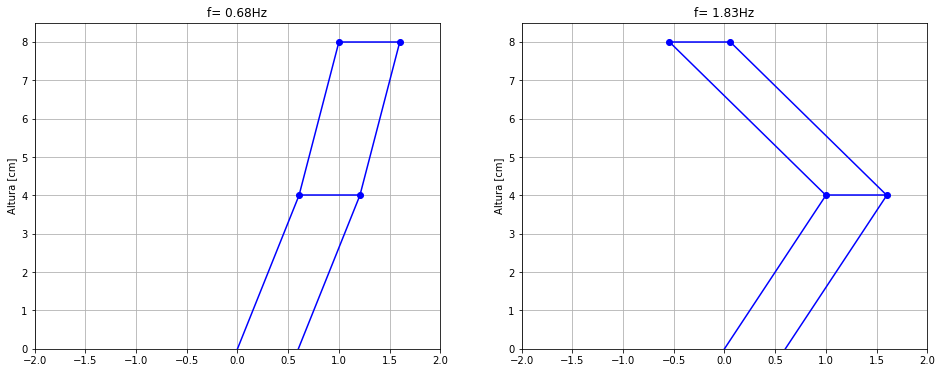

In [318]:
# Problema de autovalores e autovetores
w2, Phi = sc.eig(K, M)

iw  = w2.argsort()
w2  = w2[iw]
Phi = Phi[:,iw]

wk  = np.sqrt(np.real(w2)) 
fk  = wk/2/np.pi

print('Primeiro modo de vibra√ß√£o:  {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[0], *Phi[:,0]))
print('Segundo modo de vibra√ß√£o: {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[1], *Phi[:,1]))

## Plotagem dos 3 primeiros modos de vibra√ß√£o da estrutura
plt.figure(1, figsize=(16,6))
x = np.linspace(0,2*L,3)

for k in range(2):
    pk = np.zeros(3)
    pk[1:] = Phi[::-1,k]
    pk /=np.max(np.abs(pk))
    plt.subplot(1,2,k+1)
    
    ## Linhas Horizontais
    for n in range(2):
        o = np.linspace(pk[n+1],pk[n+1]+.6,2)
        y1 = np.ones(2)*n*L+L
        plt.plot(o, y1, 'b')
    
    ## Pontos
    plt.plot(pk[1:],x[1:],'bo')
    plt.plot(pk[1:]+.6, x[1:], 'bo')
    
    ## Linhas Verticais
    plt.plot(pk,x,'b')
    plt.plot(pk+.6, x,'b')

    plt.xlim(-2, 2); plt.ylabel("Altura [cm]");
    plt.ylim( 0.0, 2*L+.5);
    plt.title('f= {0:3.2f}Hz'.format(fk[k]));
    plt.grid(True)
    

# C√°lculo da Massa Modal    
Mk = np.diag(np.dot(Phi.T, np.dot(M, Phi)))

print('Primeira Massa Modal:  {0:7.2f}kg'.format(Mk[0]))
print('Segunda Massa Modal: {0:7.2f}kg'.format(Mk[1]))

## 2. Modelo Reduzido <a name="section_2"></a> 

### 2.1 Propriedades do Modelo <a name="section_21"></a>

### 2.1.2 Shear Building <a name="section_212"></a>  

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


### 2.2 Frequ√™ncias e Modos de Vibra√ß√£o <a name="section_22"></a>  



### Par√¢metros Iniciais

L  = 0.16
#EI = 2.05e11*(0.02*0.0005**3)/12
EI = 0.71e11*((0.02*0.0006**3)/12)
k  = 12*EI/L/L/L

m1 = 0.12880952
m2 = 0.1058589

### Matrizes de Rigidez e Massa

# Stiffness coefficients in N/m
K = np.array ([[ 2*k, -2*k], 
               [-2*k,  4*k]])


# Lumped mass matrix in kg


M = np.array([ [m1,  0,], 
               [0,  m2,]])

print ("Matriz de rigidez\n",K)
print ("Matriz de Massa (lumped)\n",M)

### C√°lculo das Frequ√™ncias e Modos de Vibra√ß√£o

# Uses scipy to solve the standard eigenvalue problem
w2, Phi = sc.eig(K, M)

# Ensure ascending order of eigenvalues
iw  = w2.argsort()
w2  = w2[iw]
Phi = Phi[:,iw]

# Eigenvalues to vibration frequencies
wk  = np.sqrt(np.real(w2)) 
fk  = wk/2/np.pi

print('First vibration mode:  {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[0], *Phi[:,0]))
print('Second vibration mode: {0:5.2f}Hz, [{1:6.3f} {2:6.3f}]'.format(fk[1], *Phi[:,1]))

## Plotagem dos 3 primeiros modos de vibra√ß√£o da estrutura
plt.figure(1, figsize=(16,6))
x = np.linspace(0,2*L,3)

for k in range(2):
    pk = np.zeros(3)
    pk[1:] = Phi[::-1,k]
    pk /=np.max(np.abs(pk))
    plt.subplot(1,2,k+1)
    
    ## Linhas Horizontais
    for n in range(2):
        o = np.linspace(pk[n+1],pk[n+1]+.6,2)
        y1 = np.ones(2)*n*L+L
        plt.plot(o, y1, 'b')
    
    ## Pontos
    plt.plot(pk[1:],x[1:],'bo')
    plt.plot(pk[1:]+.6, x[1:], 'bo')
    
    ## Linhas Verticais
    plt.plot(pk,x,'b')
    plt.plot(pk+.6, x,'b')

    plt.xlim(-2, 2); plt.ylabel("Altura [cm]");
    plt.ylim( 0.0, 2*L+.01);
    plt.title('f= {0:3.2f}Hz'.format(fk[k]));
    plt.grid(True)
    
Mk = np.diag(np.dot(Phi.T, np.dot(M, Phi)))

print('First mode modal mass is:  {0:7.2f}kg'.format(Mk[0]))
print('Second mode modal mass is: {0:7.2f}kg'.format(Mk[1]))

## Modelo reduzido

In [319]:
# Importando Matriz Dimensional (LMT)
DimData = pd.read_excel('resources/DimData.xlsx', sheet_name='DimData', index_col=0)
pi = np.pi;

Para efeturar os c√°lculos da estrutura reduzida ser√° necess√°rio definir as 3 grandezas que formar√£o a nova base da matriz dimensional. Escolheu-se comprimento (L), acelera√ß√£o (a) e massa (m).

In [320]:
ABC    = ['L', 'a', 'm']           
LMT    = ['L', 'M', 'T']           
base   =  DimData.loc[ABC, LMT]    
i_base =  np.linalg.inv(base)      

print(base)

   L  M  T
L  1  0  0
a  1  0 -2
m  0  1  0


As escalas para as grandezas adotadas para a nova base s√£o:

In [321]:
Œª_L    =  1/25                       # Escala de comprimento do modelo real
Œª_a    =  1/1                        # Escala de acelera√ß√£o (gravidade)
Œª_m   =  141.577802500/(30*10**6)        # Escala de massa

REESCREVER!!!  
Agora calcula-se as escalas para quantidades adicionais relevantes para construir a estrutura reduzida e interpretar os resultados. Eles podem ser frequencias, f, rigidez √† flex√£o, EI e a massa de cada pavimento, m. Primeiramente, preparamos a matriz dimensional para as quantidades selecionadas:

In [322]:
par    = ['f', 'EI', 'm', 'P']               # selected scales to be calculated
npar   =  len(par)                           # number of quantities
DimMat =  DimData.loc[par, LMT]              # the dimensional matrix

print(DimMat)                     

    L  M  T
f   0  0 -1
EI  3  1 -2
m   0  1  0
P   2  1 -3


Em seguida, altera-se a base da matriz dimensional:

In [323]:
scales =  np.tile([Œª_L, Œª_a, Œª_m],(npar,1))

NewMat = pd.DataFrame(data    = np.dot(DimMat, i_base),
                      index   = DimMat.index,
                      columns = ABC)
print(NewMat)

      L    a    m
f  -0.5  0.5  0.0
EI  2.0  1.0  1.0
m   0.0  0.0  1.0
P   0.5  1.5  1.0


Calcula-se as escalas que ir√£o relacionar os modelos. Por fim, obtem-se os par√¢metros desejados para o modelo reduzido:

In [324]:
[Œª_f, Œª_EI, Œª_m, Œª_P]  = np.prod(scales**NewMat, axis=1);

print('Escala de Frequencia:  Œª_f  = 1:{0:4.2f}'.format(1/Œª_f),  '\n'
      'Escala de Rigidez:     Œª_EI = 1:{0:4.2f}'.format(1/Œª_EI), '\n'
      'Escala de Massa:       Œª_m  = 1:{0:4.2f}'.format(1/Œª_m),  '\n'
      'Escala de Potencia:    Œª_P  = 1:{0:4.2f}'.format(1/Œª_P))

Escala de Frequencia:  Œª_f  = 1:0.20 
Escala de Rigidez:     Œª_EI = 1:132436015.17 
Escala de Massa:       Œª_m  = 1:211897.62 
Escala de Potencia:    Œª_P  = 1:1059488.12


In [327]:
print('Massa do Pavimento:      {0:5.4f}kg'.format(m1*Œª_m))
print('Rigidez da Estrutura:    {0:5.10f}Nm¬≤'.format(EIr*Œª_EI))
print('Comprimento da Coluna:   {0:5.2f}m'.format(L*Œª_L))
fkr = fk*Œª_f
print('Primeira Frequencia:     {0:5.2f}Hz'.format(fkr[0]))
print('Segunda Frequencia:      {0:5.2f}Hz'.format(fkr[1]))


Massa do Pavimento:      0.1416kg
Rigidez da Estrutura:    0.0280936427Nm¬≤
Comprimento da Coluna:    0.16m
Primeira Frequencia:      3.40Hz
Segunda Frequencia:       9.14Hz


### Constru√ß√£o do Modelo

## Resumo

### 2.1.1 Geometria e Material <a name="section_211"></a>  
O modelo reduzido a ser utilizado tem as seguintes caracter√≠sitcas:

* Dimens√µes das Colunas:    
  $B \times H = 0.006 \times 0.020 {\rm m}$  
* Altura das Colunas:    
  $L_{\rm 1} = 0.16  {\rm m}$    
* Propriedades da Se√ß√£o Transversal:    
  $A = 1.2\times 10^{-4}{\rm m}^2$ e $I = 3.6 \times 10^{-10}{\rm m}^4$ <br>
* Peso Espec√≠fico do A√ßo:    
  $\rho_{\rm s} = 2725 {\rm kg/m}^3$    
* M√≥dulo de Elasticidade do Alum√≠nio:    
  $E_{\rm s} = 71 \times 10^{9} {\rm N/m}^2$ 
* Rigidez √† flex√£o:   
  $E_{\rm s}\times I = 2.56 \times 10^{1} Nm^2 $
* Massa do Pavimento Superior:    
  $m_{\rm 1} = 0.1176101  {kg}$ 
* Massa do Pavimento Inferior:    
  $m_{\rm 2} = 0.1058589  {kg}$ 

<img src="resources/shear building1.png" alt="sag_tension" width="480px"/>
<img src="resources/shear building2.png" alt="sag_tension" width="480px"/>


In [328]:
Ea=71*10**9
Ia=EIr*Œª_EI/Ea
b = 0.02
h = (12*Ia/b)**(1/3)
L = 0.16

print('--------------------------------------------','\n',
      'Espessura desejada da coluna:      {0:5.1f}mm'.format(h*1000),'\n',
      'Largura desejada da coluna:        {0:5.1f}mm'.format(b*1000),'\n',
      'Comprimento da coluna (por pav.):  {0:5.1f}mm'.format(L*1000),'\n',
      '--------------------------------------------')

-------------------------------------------- 
 Espessura desejada da coluna:        0.6mm 
 Largura desejada da coluna:         20.0mm 
 Comprimento da coluna (por pav.):  160.0mm 
 --------------------------------------------


### An√°lise de Propaga√ß√£o de Erro

In [329]:
m_e = [ 0.55, 0.60, 0.65, 0.60, 0.60, 0.65, 0.60, 0.65, 0.55, 0.60, 0.60, 0.60]        # Espessura das colunas em mm
m_L = [20.60,20.40,20.90,21.00,20.70,20.70,20.30,20.10,20.20,20.40,20.30,20.30]        # Largura das colunas mm



mi_e = np.mean(m_e)
sigma_e = np.std(m_e)

mi_L = np.mean(m_L)
sigma_L = np.std(m_L)

print('--------------------------------------------','\n',
      'Espessura m√©dia da coluna:        {0:5.3f}mm'.format(mi_e),'\n',
      'Desvio padr√£o da espessura:       {0:5.3f}mm'.format(sigma_e),'\n',
      'Largura m√©dia da coluna:         {0:5.3f}mm'.format(mi_L),'\n',
      'Desvio padr√£o da largura:         {0:5.3f}mm'.format(sigma_L),'\n',
      '--------------------------------------------')

-------------------------------------------- 
 Espessura m√©dia da coluna:        0.604mm 
 Desvio padr√£o da espessura:       0.032mm 
 Largura m√©dia da coluna:         20.492mm 
 Desvio padr√£o da largura:         0.272mm 
 --------------------------------------------


In [353]:
#----------------------------------#
Ea = 71*10**9

h = st.norm(mi_e/1000,sigma_e/1000)
b = st.norm(mi_L/1000,sigma_L/1000) 



m1 = .141577802500
m2 = .126836505000




erro_m = 0.05
m1r = st.norm(m1,m1*erro_m)
m2r = st.norm(m2,m2*erro_m)
    
def autoval(E, b, h, L, m1r, m2r):
    I = (b*h**3)/12
    K = 12*Ea*I/(L*L*L)
    Kr = np.array([[ 2*K,-2*K],
                   [-2*K, 4*K]])
    
    
    Mr = np.array([[m1r[i],       0], 
                   [     0,  m2r[i]]])
    w21,Phi1 = sc.eig(Kr,Mr)



    iw = w21.argsort()
    w21 = w21[iw]                       
    Phi1 = Phi1[:,iw]

    wr = np.real(w21)
    wk = np.sqrt(w21)
    fk = wk/(2*np.pi)
    
    return fk[0],fk[1]
#------------------------------------#
n = 100000
hh = h.rvs(n)
bb = b.rvs(n)
mm1r = m1r.rvs(n)
mm2r = m2r.rvs(n)
fi = []
fi2 = []

for i in range(n):
    
    f1,f2 = autoval(Ea,bb[i],hh[i],L,mm1r,mm2r)
    fi += [f1]
    fi2 += [f2]
    
mi_f = np.mean(fi)
sigma_f = np.std(fi)
print('---------------------------------------','\n',
      'Valor m√©dio da frequ√™ncia:    {0:5.2f}hz'.format(np.real(mi_f)),'\n',
      'Valor do erro:                {0:5.2f}hz' .format(sigma_f),'\n',
      'Coeficiente de varia√ß√£o:      {0:5.2f}%'.format(sigma_f/np.real(mi_f)*100),'\n',
      '--------------------------------------')


mi_f2 = np.mean(fi2)
sigma_f2 = np.std(fi2)
print('---------------------------------------','\n',
      'Valor m√©dio da frequ√™ncia:    {0:5.2f}hz'.format(np.real(mi_f2)),'\n',
      'Valor do erro:                {0:5.2f}hz' .format(sigma_f2),'\n',
      'Coeficiente de varia√ß√£o:      {0:5.2f}%'.format(sigma_f2/np.real(mi_f2)*100),'\n',
      '--------------------------------------')

--------------------------------------- 
 Valor m√©dio da frequ√™ncia:     3.32hz 
 Valor do erro:                 0.27hz 
 Coeficiente de varia√ß√£o:       8.19% 
 --------------------------------------
--------------------------------------- 
 Valor m√©dio da frequ√™ncia:     8.94hz 
 Valor do erro:                 0.73hz 
 Coeficiente de varia√ß√£o:       8.18% 
 --------------------------------------


## Ensaios

### Frequ√™ncias Naturais

No modelo reduzido, aplicou-se separadamente um deslocamento inicial arbitr√°rio em cada um dos graus de liberdade. Por meio do registro dos aceler√¥metros, p√¥de-se gerar o periodograma caracter√≠stico do modelo.
Assim, identificou-se as frequ√™ncias naturais de viba√ß√£o correspondentes aos picos identificados no periodograma.  

<img src="resources/MODELO_INSTRUMENTADO2.jpg" alt="sag_tension" width="280px"/>

## Estrutura Submetida a Excita√ß√£o (Servo)

Excitou-se a estrutura por meio de um p√™ndulo com haste de 10.5cm e massa concentrada equivalente a 21.7262g. Este conjunto foi movimentado utilizando-se o servo Tower Pro SG90g. 
<img src="resources/PENDULO.jpg" alt="sag_tension" width="280px"/>

### Velocidade Angular do Servo

A fim de descobrir a velocidade angular de opera√ß√£o do servo, utilizou-se o girosc√≥pio do MPU6050 posicionando-o alinhado ao eixo de giro do servo. Configurou-se uma escala de leitura variando de 1000¬∞/s a -1000¬∞/s.  
Por meio da s√©rie de valores registrados, buscou-se definir a velocidade angular m√©dia e seu desvio padr√£o.

<img src="resources/TESTE_SERVO.jpg" alt="sag_tension" width="280px"/>

### Resposta a Diferentes Frequ√™ncias de Excita√ß√£o

Definida a velocidade de opera√ß√£o do servo, foi poss√≠vel configurar seu funcionamento como elemento excitador da estrutura. Por meio disso, tomou-se como refer√™ncia as frequ√™ncias naturais para defini√ß√£o de uma lista de frequ√™ncias a qual a estrutura seja excitada.  
$f_e = [fn1-1, fn1, fn1+1, fn2-1, fn2, fn2+1]   (em Hz)$  
$fn1$ = primeira frequ√™ncia natural  
$fn2$ = segunda frequ√™ncia natural  


## Resultados

### Frequ√™ncias Naturais

### Primeira Frequ√™ncia Natural

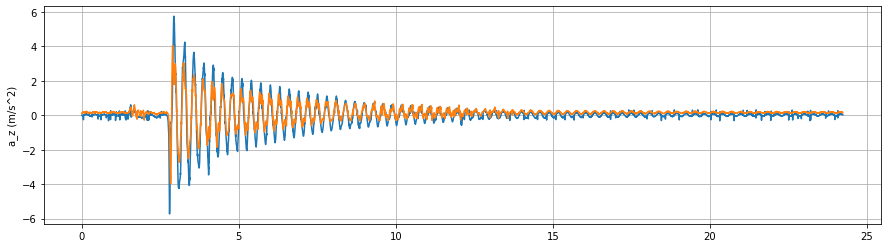

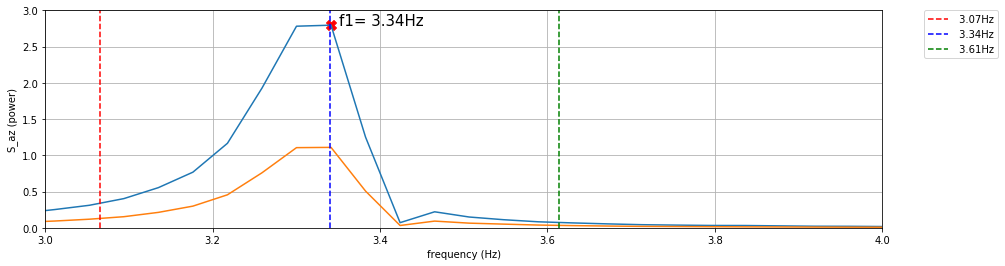

In [431]:
filename='resources/Leituras/freq1'

with gz.open(filename+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.resampling(ti,10*(data[1:,1:]/8096))

az2   = MRPy(a[0], a.fs)
t    = a.t_axis()

az1   = MRPy(a[1], a.fs)
t    = a.t_axis()

plt.figure(4, figsize=(15, 4), clear=True)
plt.plot(t, az1[0])
plt.plot(t, az2[0])

#plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
#plt.ylim(-15, 15);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

y = [0,3]
f_med = np.real(mi_f)*np.ones(2)
f_inf = (np.real(mi_f)-sigma_f)*np.ones(2)
f_sup = (np.real(mi_f)+sigma_f)*np.ones(2)



Saz11, fs11 = az1.periodogram()
f11         = az1.f_axis()

Saz22, fs22 = az2.periodogram()
f22         = az2.f_axis()

peaks, _ = find_peaks(Saz11[0], height=2.5)
fn1 = f11[peaks]

plt.figure(5, figsize=(15, 4), clear=True)


plt.plot(f11, Saz11[0])
plt.plot(f22, Saz22[0])

plt.plot(f_inf, y,'r--', label='{0:5.2f}Hz'.format(np.real(mi_f)-sigma_f))
plt.plot(f_med, y,'b--', label='{0:5.2f}Hz'.format(np.real(mi_f)))
plt.plot(f_sup, y,'g--', label='{0:5.2f}Hz'.format(np.real(mi_f)+sigma_f))


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.scatter(f11[peaks], Saz11[0,peaks], marker='X', s=100, color='red')
plt.text(f11[peaks]+0.01, Saz11[0,peaks]+0., "f1={0:5.2f}Hz".format(3.34160082), fontsize=15)

plt.xlim(3, 4);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  3);   plt.ylabel('S_az (power)') 

plt.grid(True) 

### Segunda Frequ√™ncia Natural

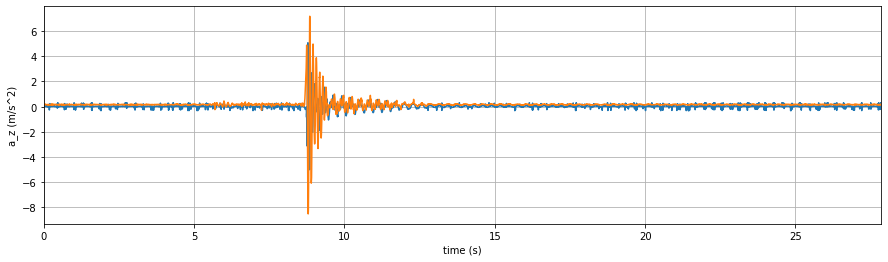

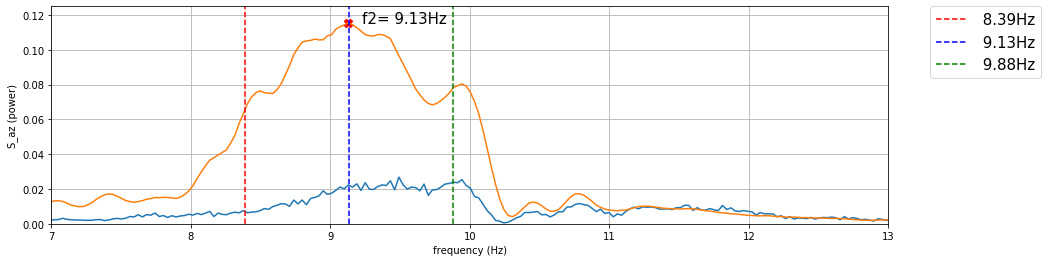

In [432]:
filename='resources/Leituras/freq2'

with gz.open(filename+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.resampling(ti,10*(data[1:,1:]/8096))

az2   = MRPy(a[0], a.fs)
t    = a.t_axis()

az1   = MRPy(a[1], a.fs)
t    = a.t_axis()

plt.figure(4, figsize=(15, 4), clear=True)
plt.plot(t, az1[0])
plt.plot(t, az2[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
#plt.ylim(-15, 15);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

y = [0,.5]
f_med = np.real(mi_f2)*np.ones(2)
f_inf = (np.real(mi_f2)-sigma_f2)*np.ones(2)
f_sup = (np.real(mi_f2)+sigma_f2)*np.ones(2)



Saz11, fs11 = az1.periodogram()
f11         = az1.f_axis()

Saz22, fs22 = az2.periodogram()
f22         = az2.f_axis()



plt.figure(5, figsize=(15, 4), clear=True)


plt.plot(f11, Saz11[0])
plt.plot(f22, Saz22[0])

plt.plot(f_inf, y,'r--', label='{0:5.2f}Hz'.format(np.real(mi_f2)-sigma_f2))
plt.plot(f_med, y,'b--', label='{0:5.2f}Hz'.format(np.real(mi_f2)))
plt.plot(f_sup, y,'g--', label='{0:5.2f}Hz'.format(np.real(mi_f2)+sigma_f2))


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)

peaks, _ = find_peaks(Saz22[0], height=.109)
fn2=f22[peaks]
plt.scatter(f22[peaks], Saz22[0,peaks], marker='X', s=70, color='red')
plt.text(f22[peaks]+0.1, Saz22[0,peaks]+0.0, "f2={0:5.2f}Hz".format(9.12943272), fontsize=15)

plt.xlim(7, 13);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  .125);   plt.ylabel('S_az (power)') 

plt.grid(True) 

## Estrutura Submetida a Excita√ß√£o (Servo)

### Velocidade Angular do Servo

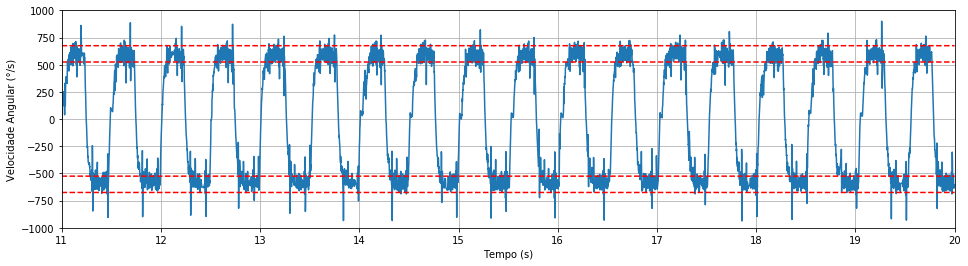

In [487]:
veloc_ang='leitura_excitador/2019-11-15__16-04-57'

with gz.open(veloc_ang+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.resampling(ti,(data[1:,1:])/32.8)

az   = MRPy(a[0], a.fs)
t    = a.t_axis()
lim_s = (600+75)*np.ones(np.size(t))
lim_i = (600-75)*np.ones(np.size(t))


plt.figure(4, figsize=(16, 4), clear=True)
plt.plot(t, az[0])
plt.plot(t, lim_s, 'r--')
plt.plot(t, lim_i, 'r--')
plt.plot(t, -lim_s, 'r--')
plt.plot(t, -lim_i, 'r--')

plt.xlim(11, 20);  plt.xlabel('Tempo (s)') 
plt.ylim(-1000, 1000);
plt.ylabel('Velocidade Angular (¬∞/s)') 

plt.grid(True) 


plt.grid(True)

In [488]:
n=0
for i in range (np.size(t)):
    if az[0,i]>=600-75 or az[0,i]<=-600+75:
        n+=1
V=np.ones(n)        
n=0
for i in range (np.size(t)):
    if az[0,i]>=600-75:
        V[n]=az[0,i]
        n+=1
    elif az[0,i]<=-600+75:
        V[n]=-az[0,i]
        n+=1

        
mi_V = np.mean(V)
sigma_V = np.std(V)

print('---------------------------------------------------','\n',
      'N√∫mero de amostras coletadas:              {0:5.0f}'.format(n),'\n',
      'Velocidade angular:                      {0:5.2f}¬∞'.format(mi_V),'\n',
      'Desvio padr√£o da velocidade angular       {0:5.2f}¬∞'.format(sigma_V),'\n',
      '---------------------------------------------------')

--------------------------------------------------- 
 N√∫mero de amostras coletadas:               8945 
 Velocidade angular:                      603.46¬∞ 
 Desvio padr√£o da velocidade angular       49.25¬∞ 
 ---------------------------------------------------


In [489]:
V = st.norm(mi_V,sigma_V)
n = 100000


def freq_var(n, V, Vs, fn):
    f=np.zeros(n)
    vv = V.rvs(n)
    Vs = mi_V
    A=Vs/(4*fn)
    for i in range (n):
        f[i]=vv[i]/(4*A)
    return f

fe1 = freq_var(n, V, mi_V, fn1)

fe2 = freq_var(n, V, mi_V, fn2)

    
mi_fe1 = np.mean(fe1)
sigma_fe1 = np.std(fe1)    

mi_fe2 = np.mean(fe2)
sigma_fe2 = np.std(fe2)    




print('---------------------------------------------------','\n',
      'Primeira frequ√™ncia natural (fn1):         {0:5.2f}Hz'.format(mi_fe1),'\n',
      'Desvio padr√£o de fn1:                      {0:5.2f}Hz'.format(sigma_fe1),'\n',
      'Segunda frequ√™ncia natural (fn2):          {0:5.2f}Hz'.format(mi_fe2),'\n',
      'Desvio padr√£o de fn2:                      {0:5.2f}Hz'.format(sigma_fe2),'\n',
      '---------------------------------------------------')



--------------------------------------------------- 
 Primeira frequ√™ncia natural (fn1):          3.34Hz 
 Desvio padr√£o de fn1:                       0.27Hz 
 Segunda frequ√™ncia natural (fn2):           9.13Hz 
 Desvio padr√£o de fn2:                       0.74Hz 
 ---------------------------------------------------


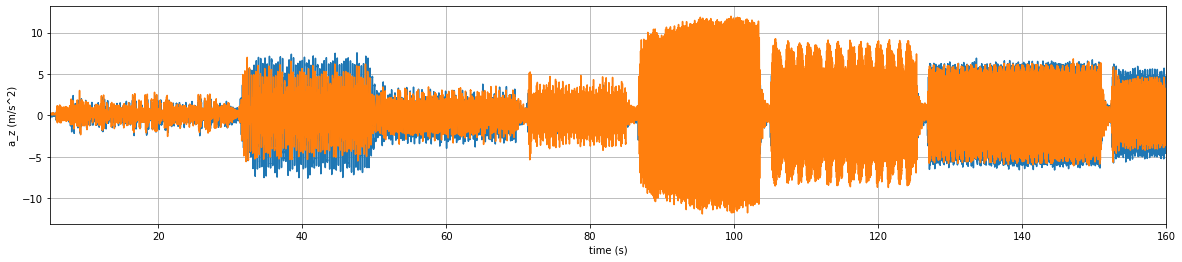

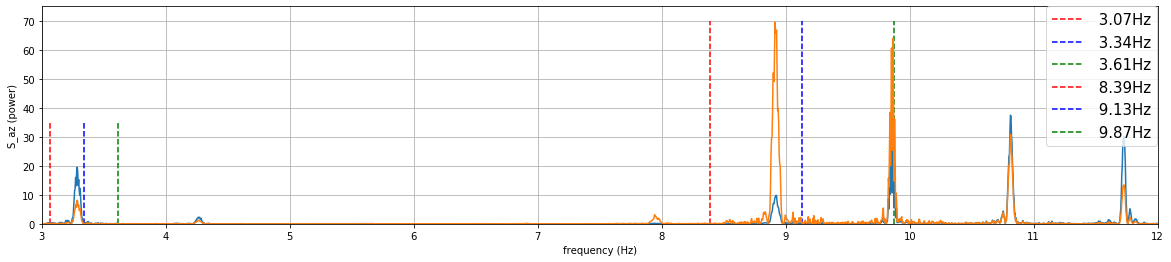

In [490]:
filename='resources/Leituras/2019-11-16__07-48-06'    # Todas as frequ√™ncias


with gz.open(filename+'.csv.gz', 'rb') as target:
    data =  np.genfromtxt(target, 
                          delimiter=',')
    ti   =  data[1:,0] - data[1,0]
    
a=MRPy.resampling(ti,10*(data[1:,1:]/8096))

az2   = MRPy(a[0], a.fs)
t    = a.t_axis()
az1   = MRPy(a[1], a.fs)
t    = a.t_axis()

#FREQ. 2.44 Hz

plt.figure(4, figsize=(20, 4), clear=True)
plt.plot(t, az1[0])
plt.plot(t, az2[0])

plt.xlim(5,160);  plt.xlabel('time (s)') 
#plt.ylim(-15, 15);
plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

Saz11, fs11 = az1.periodogram()
f11         = az1.f_axis()

Saz22, fs22 = az2.periodogram()
f22         = az2.f_axis()

x1=[2.425, 2.425]
x2=[3.39, 3.39]
x3=[4.37, 4.37]
x4=[2.425, 2.425]
y=[0,15]


y1 = [0,35]
f_med1 = np.real(mi_fe1)*np.ones(2)
f_inf1 = (np.real(mi_fe1)-sigma_fe1)*np.ones(2)
f_sup1 = (np.real(mi_fe1)+sigma_fe1)*np.ones(2)


y2 = [0,70]
f_med2= np.real(mi_fe2)*np.ones(2)
f_inf2= (np.real(mi_fe2)-sigma_fe2)*np.ones(2)
f_sup2= (np.real(mi_fe2)+sigma_fe2)*np.ones(2)




plt.figure(5, figsize=(20, 4), clear=True)

plt.plot(f_inf1, y1,'r--', label='{0:5.2f}Hz'.format(np.real(mi_fe1)-sigma_fe1))
plt.plot(f_med1, y1,'b--', label='{0:5.2f}Hz'.format(np.real(mi_fe1)))
plt.plot(f_sup1, y1,'g--', label='{0:5.2f}Hz'.format(np.real(mi_fe1)+sigma_fe1))
plt.legend(bbox_to_anchor=(.90, 1), loc='upper left', borderaxespad=0., fontsize=15)

                 
                 
plt.plot(f_inf2, y2,'r--', label='{0:5.2f}Hz'.format(np.real(mi_fe2)-sigma_fe2))
plt.plot(f_med2, y2,'b--', label='{0:5.2f}Hz'.format(np.real(mi_fe2)))
plt.plot(f_sup2, y2,'g--', label='{0:5.2f}Hz'.format(np.real(mi_fe2)+sigma_fe2))
plt.legend(bbox_to_anchor=(.90, 1), loc='upper left', borderaxespad=0., fontsize=15)


plt.plot(f11, Saz11[0])
plt.plot(f22, Saz22[0])


plt.xlim(3, 12);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  75);   plt.ylabel('S_az (power)') 

plt.grid(True)

## 2. Funcionamento do Motor (servo)

Velocidade angular constante ($\phi$)

#### 2.1 Defini√ß√£o da Velocidade Angular ($\omega \phi$)  
20 medi√ß√µes com o transferidor (fazer um tranferidor de papel 360¬∞).  
Adotar um sleeptime que fa√ßa a posi√ß√£o final ser prox de 180¬∞

In [19]:
## Gera√ß√£o de sinal triangular

                    # Frequ√™ncia do sinal triangular (Hz)  
Td1 = 1/np.real(mi_f)
Td2 = 1/np.real(mi_f2)
Tt =  2                    # Tempo total de an√°lise

N1 = int(Tt/(Td1/50))                   # Discretiza√ß√£o do tempo
N2 = int(Tt/(Td2/50))


t1=np.linspace(0,Tt,N1+1)
t2=np.linspace(0,Tt,N2+1)

V = 600                     # Velocidade angular (graus/s)
D1 = V*(Td1/4)
D2 = V*(Td2/4)

triangle1 = signal.sawtooth(2*np.pi*fk[0]*(t1+Td1/4), 0.5)
triangle2 = signal.sawtooth(2*np.pi*fk[1]*(t2+Td2/4), 0.5)
ùúô1 = triangle1*D1                # Deslocamento Angular [graus] 
ùúô2 = triangle2*D2

Lh = 0.1
ux1 = Lh*np.sin(np.radians(ùúô1))
ux2 = Lh*np.sin(np.radians(ùúô2))


def derivative (f, t):
    f_d = np.zeros(f.size-1) 
    for i in range (f.size-1):
        f_d[i] = (f[i+1]-f[i])/h



v1=np.diff(ux1, n=1)/(t1[1])
a1=np.diff(v1, n=1)/(t1[1])

v2=np.diff(ux2, n=1)/(t2[1])
a2=np.diff(v2, n=1)/(t2[1])



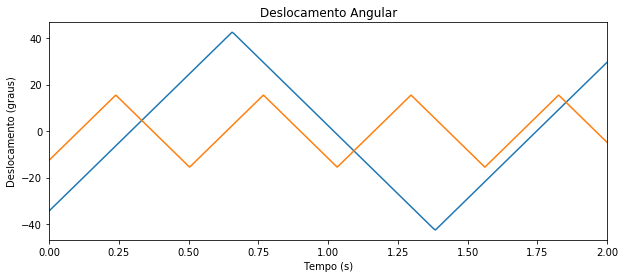

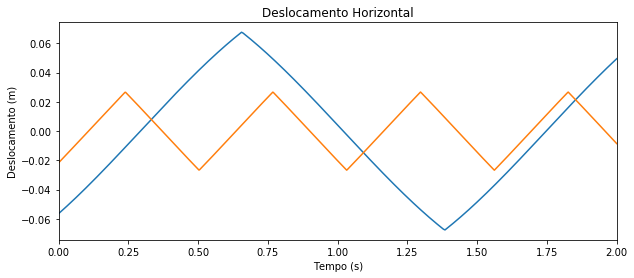

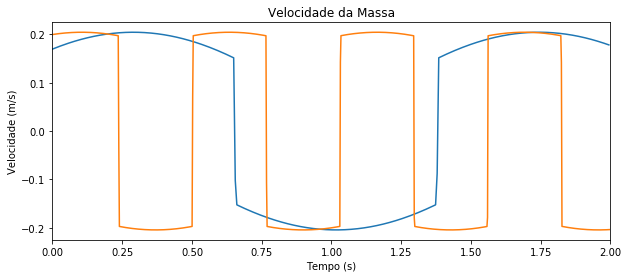

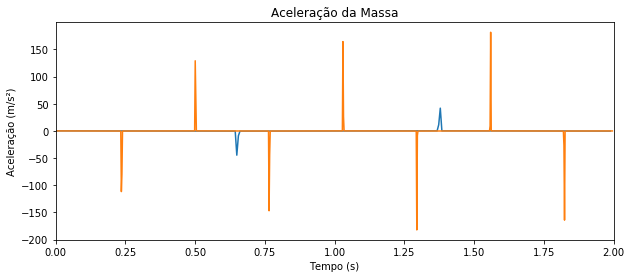

In [20]:
plt.figure(2, figsize=(10, 4), clear=True)
plt.plot(t1, ùúô1)
plt.plot(t2, ùúô2)
plt.title("Deslocamento Angular", )
plt.xlim(0, Tt);   plt.xlabel('Tempo (s)') 
plt.ylabel('Deslocamento (graus)')

plt.figure(3, figsize=(10, 4), clear=True)
plt.plot(t1, ux1)
plt.plot(t2, ux2)
plt.title("Deslocamento Horizontal", )
plt.xlim(0, Tt);   plt.xlabel('Tempo (s)') 
plt.ylabel('Deslocamento (m)')

plt.figure(4, figsize=(10, 4), clear=True)
plt.plot(t1[:-1], v1)
plt.plot(t2[:-1], v2)
plt.title("Velocidade da Massa")
plt.xlim(0, Tt);
plt.xlabel('Tempo (s)'); plt.ylabel('Velocidade (m/s)')

plt.figure(5, figsize=(10, 4), clear=True)
plt.plot(t1[:-2],a1)
plt.plot(t2[:-2],a2)
plt.title("Acelera√ß√£o da Massa")
plt.xlim(0, Tt);
plt.xlabel('Tempo (s)'); plt.ylabel('Acelera√ß√£o (m/s¬≤)');

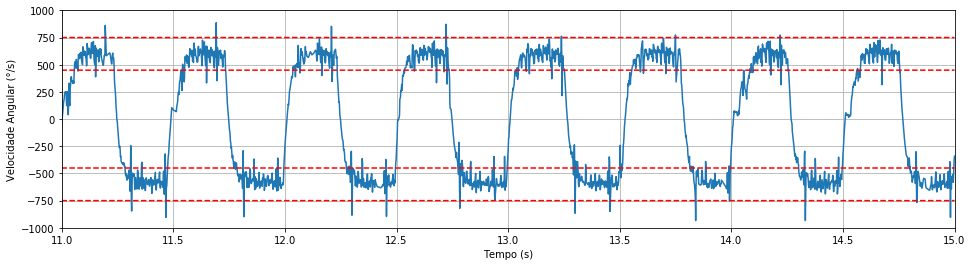

--------------------------------------------------- 
 N√∫mero de amostras coletadas:            10922.00 
 Velocidade angular:                      583.65¬∞ 
 Desvio padr√£o da velocidade angular       61.97¬∞ 
 ---------------------------------------------------


## 3. Excita√ß√£o Harm√¥nica

In [43]:
n=100000
V = st.norm(mi_V,sigma_V)
vv = V.rvs(n)
f=np.zeros(n)

#Primeira freq de vibra√ß√£o
T = 1/fkr
A = mi_V*(T/4)
f1 = vv/(4*A[0])
f2 = vv/(4*A[1])

mi_f1 = np.mean(f1)
sigma_f1 = np.std(f1)

mi_f2 = np.mean(f2)
sigma_f2 = np.std(f2)

print('---------------------------------------------------','\n',
      'Primeira frequ√™ncia de vibra√ß√£o:          {0:5.2f}Hz'.format(mi_f1),'\n',
      'Desvio padr√£o da frequ√™ncia de vibra√ß√£o   {0:5.2f}Hz'.format(sigma_f1),'\n',
      'Ssegunda frequ√™ncia de vibra√ß√£o:          {0:5.2f}Hz'.format(mi_f2),'\n',
      'Desvio padr√£o da frequ√™ncia de vibra√ß√£o   {0:5.2f}Hz'.format(sigma_f2),'\n',
      '---------------------------------------------------')


--------------------------------------------------- 
 Primeira frequ√™ncia de vibra√ß√£o:           3.44Hz 
 Desvio padr√£o da frequ√™ncia de vibra√ß√£o    0.36Hz 
 Ssegunda frequ√™ncia de vibra√ß√£o:           9.46Hz 
 Desvio padr√£o da frequ√™ncia de vibra√ß√£o    1.00Hz 
 ---------------------------------------------------
